# importing dependencies

In [1]:
import pandas as pd
import re
import spacy
import numpy as np

# Preparing the TF-IDF matrix from the text data

In [ ]:
# Import training and testing data 
X_train = pd.read_csv('./X_train_update.csv', index_col=0)


X_test = pd.read_csv('./X_test_update.csv', index_col=0)


In [ ]:
# loading the labels
y_train = pd.read_csv('./Y_train_CVw08PX.csv', index_col=0)

In [ ]:
#visualize the datframes

X_train.head()

In [ ]:
#visualize the datframes

X_test.head()

In [ ]:
#visualize the datframes

y_train.head()

In [ ]:
# dropping the irrelevant columns from the data frames

del X_train['description'], X_train['productid'], X_train['imageid']

del X_test['description'], X_test['productid'], X_test['imageid']

#renaming the column in y train 
y_train = y_train.rename(columns={"prdtypecode": "label"})

Now for all designation column in, we :

1. remove the accents - done
2. make to lowercase - done
3. remove the special char like degree or phi and the numbers
4. Tokenize - Done
5. Handling Punctuations
4. Stop work removal  - 

In [ ]:
# Function to normalize
def normalize_accent(string):
    string = string.replace('á', 'a')
    string = string.replace('â', 'a')

    string = string.replace('é', 'e')
    string = string.replace('è', 'e')
    string = string.replace('ê', 'e')
    string = string.replace('ë', 'e')

    string = string.replace('î', 'i')
    string = string.replace('ï', 'i')

    string = string.replace('ö', 'o')
    string = string.replace('ô', 'o')
    string = string.replace('ò', 'o')
    string = string.replace('ó', 'o')

    string = string.replace('ù', 'u')
    string = string.replace('û', 'u')
    string = string.replace('ü', 'u')

    string = string.replace('ç', 'c')

    
    return string

In [ ]:
# function to tokenize
def raw_to_tokens(raw_string, spacy_nlp):
    # Write code for lower-casing
    string = raw_string.lower()
    
    # Write code to normalize the accents
    string = normalize_accent(string)
        
    # Write code to tokenize
    spacy_tokens = spacy_nlp(string)
        
    # Write code to remove punctuation tokens and create string tokens
    string_tokens = [token.orth_ for token in spacy_tokens if not token.is_punct if not token.is_stop]
    
    # Write code to join the tokens back into a single string
    clean_string = " ".join(string_tokens)
    
    return clean_string

In [ ]:
# remove the special char like degree or phi 
X_train['designation_sp'] = X_train['designation'].apply(lambda x: re.sub('\W+'," ", x ))
X_test['designation_sp'] = X_test['designation'].apply(lambda x: re.sub('\W+'," ", x ))

In [ ]:
# reomve numbers
X_train['designation_number'] = X_train['designation_sp'].str.replace('\d+', '')
X_test['designation_number'] = X_test['designation_sp'].str.replace('\d+', '')

In [ ]:
# import and load spacy and download the french package

# !python -m spacy download fr


# Load spaCy for french
spacy_nlp = spacy.load('fr')

In [ ]:
# tokenize the train file
X_train['designation'] = X_train['designation_number'].apply(lambda x: raw_to_tokens(x, spacy_nlp))

In [ ]:
# tokenize the test file
X_test['designation'] = X_test['designation_number'].apply(lambda x: raw_to_tokens(x, spacy_nlp))

In [ ]:
desc_list_train = X_train['designation']

In [35]:
desc_list_test = X_test['designation']

In [39]:
frames = [desc_list_train, desc_list_test]
consolidated_desc = pd.concat(frames)

In [41]:
# Write code to import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Write code to create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Write code to vectorize the sample text
X_tfidf_sample = tfidf.fit_transform(consolidated_desc.astype('U'))

print("Shape of the TF-IDF Matrix:")
print(X_tfidf_sample.shape)


Shape of the TF-IDF Matrix:
(98728, 64055)


In [42]:
# optinal step to print details about the matrix
print("TF-IDF Matrix:")
print(X_tfidf_sample.todense())
print(tfidf.get_feature_names())

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['a_gnexian', 'a_hoeroie', 'aa', 'aaa', 'aaahkada', 'aalborg', 'aalto', 'aaltonen', 'aam', 'aan', 'aarcades', 'aardvark', 'aargh', 'aarib', 'aaron', 'aassassin', 'aayla', 'ab', 'ab_direct_import', 'abacusspiele', 'abaissement', 'abalone', 'abandon', 'abandonne', 'abandonnee', 'abandonnees', 'abaque', 'abarth', 'abat', 'abatons', 'abats', 'abattage', 'abattant', 'abattante', 'abattants', 'abattoirs', 'abattr', 'abattu', 'abattus', 'abba', 'abbadie', 'abbas', 'abbatant', 'abbaye', 'abbe', 'abbeville', 'abbey', 'abbeys', 'abbi', 'abbreviaturarum', 'abbs', 'abc', 'abcderm', 'abcs', 'abcynthia', 'abd', 'abdallah', 'abdelaziz', 'abdelrazak', 'abdication', 'abdique', 'abdomen', 'abdominal', 'abdominale', 'abdominaux', 'abdoul', 'abdoulwhaid', 'abductor', 'abdur', 'abeba', 'abecassis', 'abecedaires', 'abeil', 'abeille', 'abei

# We can now save the matrix and import it for our use later


In [44]:
from scipy import sparse

sparse.save_npz("./X_consolidated_without_numbers.npz", X_tfidf_sample)

Here it is worth noting that the TF-IDF matrix has both the test and the train components in it, hence we load the TF-IDF martix again, we shall split the text and train datasets from it

# predicting using the Neural Network using the TF-IDF

In [2]:

#Loading the matrix
from scipy import sparse
X_tfidf_sample = sparse.load_npz("./X_consolidated_without_numbers.npz")


In [3]:
import pandas as pd
y_train = pd.read_csv('/home/jupyter/Ensemble/Y_train_CVw08PX.csv', index_col=0)

In [179]:
X_train = X_tfidf_sample[:84916, : ]
X_test = X_tfidf_sample[84916:, : ]

In [5]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
lb = LabelEncoder()
y = lb.fit_transform(y_train)
dummy_y_train = np_utils.to_categorical(y.ravel())

# Custom NN


In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
def build_model():
    model = Sequential()
    model.add(Dense(256, input_dim=64055, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(160, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(27, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.summary()
    return model

In [12]:
# printing the model summary

build_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               16398336  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               51400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 160)               32160     
_________________________________________________________________
dropout_3 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

estimator = KerasClassifier(build_fn=build_model, epochs=75, batch_size=128)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('./data/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = estimator.fit(X_train, dummy_y_train, validation_split=0.2, callbacks=[es, mc])


Train on 67932 samples, validate on 16984 samples
Epoch 1/75
67932/67932 [==============================] - 67s 984us/step - loss: 1.7099 - accuracy: 0.4917 - val_loss: 0.9749 - val_accuracy: 0.7096

Epoch 00001: val_accuracy improved from -inf to 0.70961, saving model to ./data/best_model.h5
Epoch 2/75
67932/67932 [==============================] - 67s 981us/step - loss: 0.7994 - accuracy: 0.7569 - val_loss: 0.8409 - val_accuracy: 0.7668

Epoch 00002: val_accuracy improved from 0.70961 to 0.76678, saving model to ./data/best_model.h5
Epoch 3/75
67932/67932 [==============================] - 67s 982us/step - loss: 0.4766 - accuracy: 0.8597 - val_loss: 0.8885 - val_accuracy: 0.7784

Epoch 00003: val_accuracy improved from 0.76678 to 0.77838, saving model to ./data/best_model.h5
Epoch 4/75
67932/67932 [==============================] - 67s 984us/step - loss: 0.3069 - accuracy: 0.9139 - val_loss: 0.9605 - val_accuracy: 0.7725

Epoch 00004: val_accuracy did not improve from 0.77838
Epoch 5

In [64]:
from matplotlib import pyplot

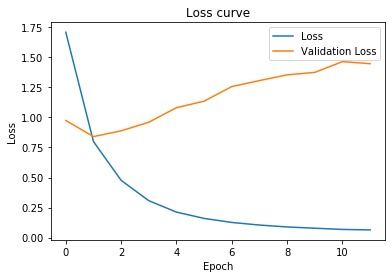

In [65]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("Loss curve")
pyplot.ylabel("Loss")
pyplot.xlabel("Epoch")
pyplot.legend(["Loss","Validation Loss"])
pyplot.show()

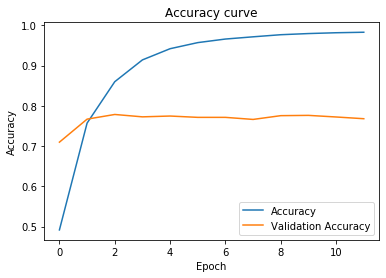

In [66]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title("Accuracy curve")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
pyplot.legend(["Accuracy","Validation Accuracy"])
pyplot.show()

In [70]:
# getting outputs

y_test = estimator.predict(X_test)
y_pred = lb.inverse_transform(y_test)


In [71]:
# Submission
sub = pd.DataFrame({'class': y_pred}, columns=['class'])
sub.to_csv('./nn_output.csv', index=False)

# Add more layers to the NN

In [181]:
def build_model_dense():
    model = Sequential()
    model.add(Dense(512, input_dim=64055, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(450, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(350, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(225, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(27, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.summary()
    return model

In [178]:
build_model_dense()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               32796672  
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 450)               230850    
_________________________________________________________________
dropout_20 (Dropout)         (None, 450)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 400)               180400    
_________________________________________________________________
dropout_21 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 350)             

In [182]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

estimator = KerasClassifier(build_fn=build_model_dense, epochs=75, batch_size=128)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('./data/best_model_dense.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = estimator.fit(X_train, dummy_y_train, validation_split=0.2, callbacks=[es, mc])


Train on 67932 samples, validate on 16984 samples
Epoch 1/75
67932/67932 [==============================] - 113s 2ms/step - loss: 1.6717 - accuracy: 0.4890 - val_loss: 0.9940 - val_accuracy: 0.7006

Epoch 00001: val_accuracy improved from -inf to 0.70060, saving model to ./data/best_model_dense.h5
Epoch 2/75
67932/67932 [==============================] - 113s 2ms/step - loss: 0.7208 - accuracy: 0.7815 - val_loss: 0.8389 - val_accuracy: 0.7605

Epoch 00002: val_accuracy improved from 0.70060 to 0.76054, saving model to ./data/best_model_dense.h5
Epoch 3/75
67932/67932 [==============================] - 114s 2ms/step - loss: 0.3893 - accuracy: 0.8882 - val_loss: 0.8960 - val_accuracy: 0.7727

Epoch 00003: val_accuracy improved from 0.76054 to 0.77273, saving model to ./data/best_model_dense.h5
Epoch 4/75
67932/67932 [==============================] - 114s 2ms/step - loss: 0.2226 - accuracy: 0.9386 - val_loss: 1.0663 - val_accuracy: 0.7720

Epoch 00004: val_accuracy did not improve from 0

In [184]:
from matplotlib import pyplot

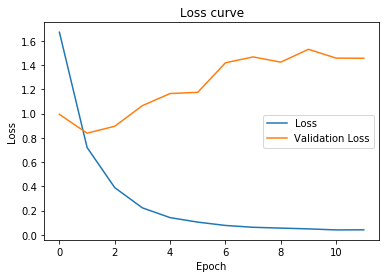

In [185]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("Loss curve")
pyplot.ylabel("Loss")
pyplot.xlabel("Epoch")
pyplot.legend(["Loss","Validation Loss"])
pyplot.show()

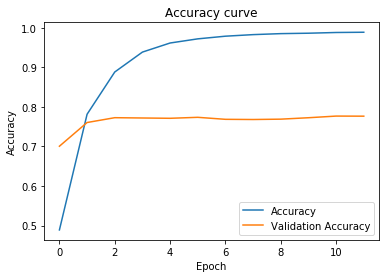

In [186]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title("Accuracy curve")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
pyplot.legend(["Accuracy","Validation Accuracy"])
pyplot.show()

In [187]:
# getting outputs

y_test = estimator.predict(X_test)
y_pred = lb.inverse_transform(y_test)

# Submission
sub = pd.DataFrame({'class': y_pred}, columns=['class'])
sub.to_csv('./nn_output_dense.csv', index=False)